CS677 - MACHINE LEARNING - PROJECT 3

GROUP MEMBERS: AAYUSH DESAI, KRUPALI SHINDE, ONAL BHIRUD

**1) Perform Explanatory Data Analysis (EDA) / indicate how features correlate among
themselves, with emphasis to the target/label one**

In [165]:
import pandas as pd  #for data manipulation operations
import numpy as np  #for numeric operations on data
import seaborn as sns  #for data visualization operations
import matplotlib.pyplot as plt  #for data visualization operations
from sklearn.preprocessing import LabelEncoder # for encoding
from sklearn.preprocessing import StandardScaler #for standardization

from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import precision_score, auc,  precision_recall_curve
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from scipy.stats import randint

from imblearn.over_sampling import SMOTE
from collections import Counter

from lightgbm import LGBMClassifier
!pip install shap
import shap
!pip install lime
import lime
!pip install eli5
import eli5

from termcolor import colored
#!pip install xgboost
from xgboost import XGBRegressor

#!pip install lightgbm
from lightgbm import LGBMRegressor

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn import set_config
set_config(print_changed_only = False)

sns.set_theme(style = "whitegrid")

print(colored("\n THE REQUIRED LIBRARIES WERE SUCCESFULLY IMPORTED...", color = "green", attrs = ["bold", "dark"]))
from IPython.display import display



 THE REQUIRED LIBRARIES WERE SUCCESFULLY IMPORTED...


In [166]:
pip --version

pip 24.0 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [167]:
pip install --upgrade pip

In [168]:
pip install eli5

In [169]:
pip install imbalanced-learn

In [6]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00


In [170]:
heart = pd.read_csv(r"heart_failure_clinical_records_dataset.csv")
df = heart.copy()
df.head(n = 10)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   
5  90.0        1                        47         0                 40   
6  75.0        1                       246         0                 15   
7  60.0        1                       315         1                 60   
8  65.0        0                       157         0                 65   
9  80.0        1                       123         0                 35   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   
5                    1  204000.00               2.1           132    1   
6                    0  127000.00               1.2           137    1   
7                    0  454000.00               1.1           131    1   
8                    0  263358.03               1.5           138    0   
9                    1  388000.00               9.4           133    1   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1  
5        1     8            1  
6        0    10            1  
7        1    10            1  
8        0    10            1  
9        1    10            1

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### changing column values for better understanding

In [173]:
df_eda = pd.DataFrame()

df_eda["age"] = df["age"]
df_eda["anaemia"] = np.where(df["anaemia"] < 1, "no", "yes")
df_eda["creatinine_phosphokinase"] = df["creatinine_phosphokinase"]
df_eda["diabetes"] = np.where(df["diabetes"] < 1, "no", "yes")
df_eda["ejection_fraction"] = df["ejection_fraction"]
df_eda["high_blood_pressure"] = np.where(df["high_blood_pressure"] < 1, "no", "yes")
df_eda["platelets"] = df["platelets"]
df_eda["serum_creatinine"] = df["serum_creatinine"]
df_eda["serum_sodium"] = df["serum_sodium"]
df_eda["sex"] = np.where(df["sex"] < 1, "female", "male")
df_eda["smoking"] = np.where(df["smoking"] < 1, "no", "yes")
df_eda["time"] = df["time"]
df_eda["death_event"] = np.where(df["DEATH_EVENT"] < 1, "no", "yes")

df_eda.head()

age anaemia  creatinine_phosphokinase diabetes  ejection_fraction  \
0  75.0      no                       582       no                 20   
1  55.0      no                      7861       no                 38   
2  65.0      no                       146       no                 20   
3  50.0     yes                       111       no                 20   
4  65.0     yes                       160      yes                 20   

  high_blood_pressure  platelets  serum_creatinine  serum_sodium     sex  \
0                 yes  265000.00               1.9           130    male   
1                  no  263358.03               1.1           136    male   
2                  no  162000.00               1.3           129    male   
3                  no  210000.00               1.9           137    male   
4                  no  327000.00               2.7           116  female   

  smoking  time death_event  
0      no     4         yes  
1      no     6         yes  
2     yes     7         yes  
3      no     7         yes  
4      no     8         yes

In [174]:
df_eda.describe()

age  creatinine_phosphokinase  ejection_fraction      platelets  \
count  299.000000                299.000000         299.000000     299.000000   
mean    60.833893                581.839465          38.083612  263358.029264   
std     11.894809                970.287881          11.834841   97804.236869   
min     40.000000                 23.000000          14.000000   25100.000000   
25%     51.000000                116.500000          30.000000  212500.000000   
50%     60.000000                250.000000          38.000000  262000.000000   
75%     70.000000                582.000000          45.000000  303500.000000   
max     95.000000               7861.000000          80.000000  850000.000000   

       serum_creatinine  serum_sodium        time  
count         299.00000    299.000000  299.000000  
mean            1.39388    136.625418  130.260870  
std             1.03451      4.412477   77.614208  
min             0.50000    113.000000    4.000000  
25%             0.90000    134.000000   73.000000  
50%             1.10000    137.000000  115.000000  
75%             1.40000    140.000000  203.000000  
max             9.40000    148.000000  285.000000

In [175]:
df.isnull().any() #to check "null" values

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

**DATA VISUALIZTION**
## 1.⁠ ⁠Univariate Analysis of Categorical variables
*   anaemia
*   high_blood_pressure
*   diabetes
*   sex
*   smoking
*   DEATH_EVENT

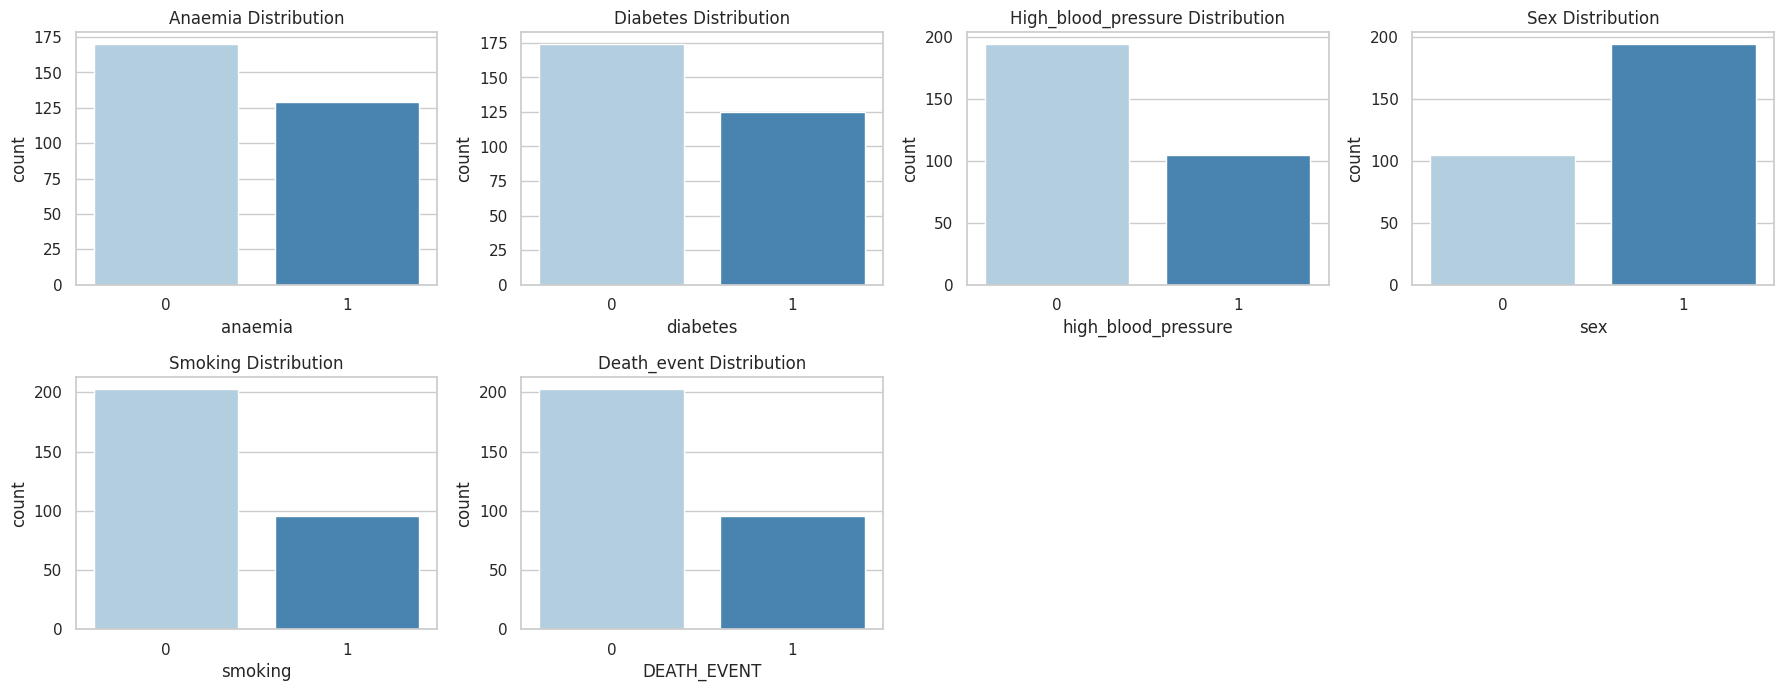

In [176]:
attributes = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking", "DEATH_EVENT"]

plt.figure(figsize=(18, 10), dpi=100)

for i, attribute in enumerate(attributes, 1):
    plt.subplot(3, 4, i)
    sns.countplot(x=attribute, data=heart, palette="Blues")
    plt.title(attribute.capitalize() + " Distribution")

plt.tight_layout()
plt.show()



### 2. Distribution of Age

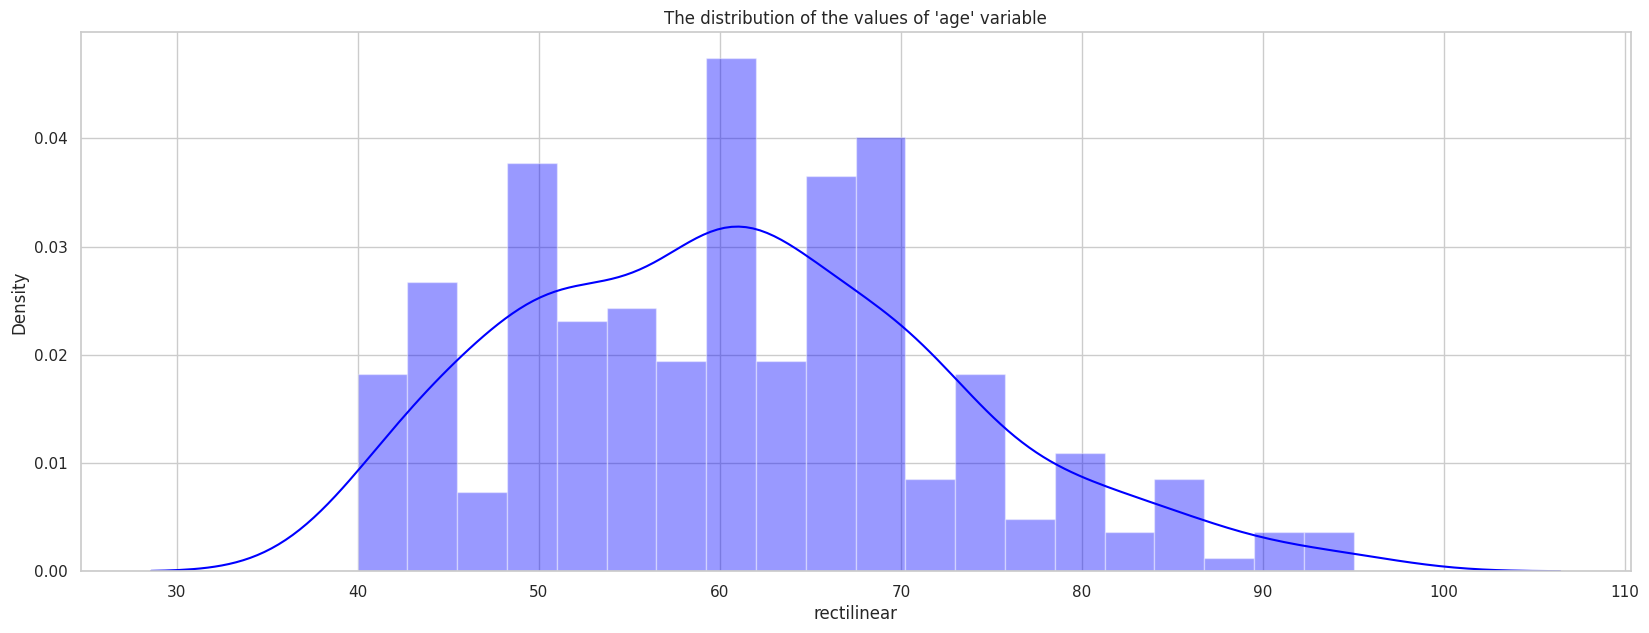

In [177]:
fig, ax = plt.subplots( figsize=(20, 7))

sns.distplot(ax , x = df_eda["age"],
             hist = True,
             bins = 20,
             kde = True,
             vertical = False, color = "blue").set(title = "The distribution of the values of 'age' variable");

### The age group of people ranges from 40 - 95 with visible spike in the population density at certain age intervals around [44-46], [50-52], [60-62] (highest density), [64-66], [70-72].

## The impact of age on survival rates

In [178]:
survived_age = heart[heart["DEATH_EVENT"] == 0]["age"]
not_survived_age = heart[heart["DEATH_EVENT"] == 1]["age"]


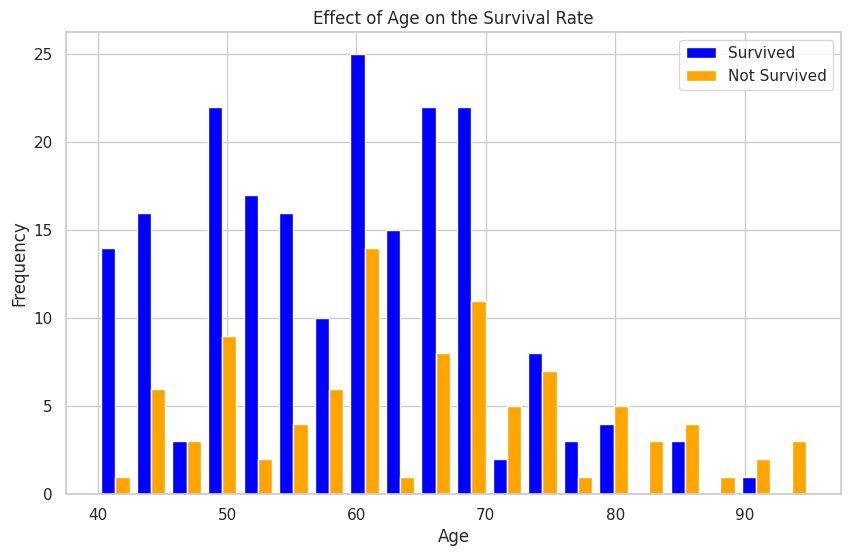

In [179]:
hist_data = [survived_age, not_survived_age]
group_labels = ['Survived', 'Not Survived']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(hist_data, bins=20, color=['blue', 'orange'], label=group_labels)
plt.title("Effect of Age on the Survival Rate")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.savefig("effect_of_age_on_survival_rate.png")
plt.show()



### 1)The survival rate is higher in the age group 50 to 70.
### 2)The likelihood of not surviving a heart failure event is present across all age groups in the population being studied. It is highest in the 60's age group. After the age of 80, the chances of survival decrease significantly.


## The impact of gender on survival rate

### Distribution of Gender

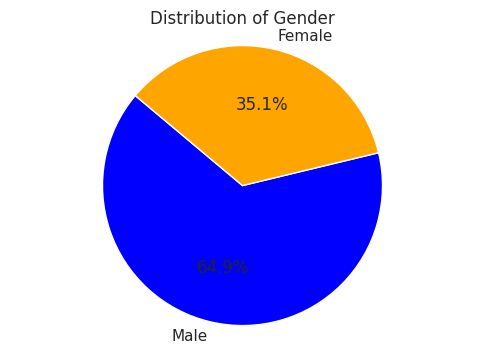

In [180]:
# Extract data for males and females
male_data = heart[heart["sex"] == 1]
female_data = heart[heart["sex"] == 0]

# Define labels and values for the pie chart
labels = ['Male', 'Female']
values = [len(male_data), len(female_data)]

# Plot the pie chart
plt.figure(figsize=(6, 4))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange'])
plt.title('Distribution of Gender')
plt.axis('equal')

plt.savefig('gender_distribution_pie_chart.png')
plt.show()


## Distribution of gender vs survival rate

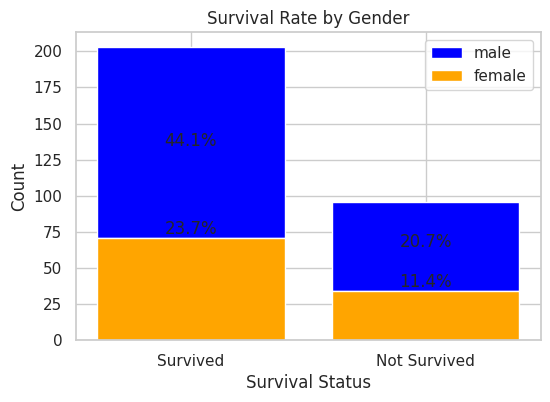

In [181]:
# Extract data for males and females
male_data = heart[heart["sex"] == 1]
female_data = heart[heart["sex"] == 0]

# Extract data for survived and not survived cases for males and females
male_survived_data = male_data[heart["DEATH_EVENT"] == 0]
male_not_survived_data = male_data[heart["DEATH_EVENT"] == 1]
female_survived_data = female_data[heart["DEATH_EVENT"] == 0]
female_not_survived_data = female_data[heart["DEATH_EVENT"] == 1]

# Define labels and values for the bar chart
labels = ['Survived', 'Not Survived']
values_male = [len(male_survived_data), len(male_not_survived_data)]
values_female = [len(female_survived_data), len(female_not_survived_data)]

# Plot the bar chart
plt.figure(figsize=(6, 4))
bars1 = plt.bar(labels, values_male, bottom=values_female, label='male', color=['blue'])
bars2 = plt.bar(labels, values_female, label='female',color=['orange'])
plt.title('Survival Rate by Gender')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.legend()

# Add text annotations with percentages
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{height / sum(values_male + values_female) * 100:.1f}%',
                 ha='center', va='bottom')

plt.savefig('survival_rate_by_gender_bar_chart.png')
plt.show()



### 1. Looking at the male population:
   *   44.1% (132) of the male population have survived
   *   20.7% (62) of the male population have succumbed to heart failure.

### 2. Looking at the female population:
   *   23.7% (71) of the population survived heart failure
   *   11.4% (34) of the population succumbed to heart failure.

## The Effect of High Blood Pressure (Hypertension) on Survival Rates

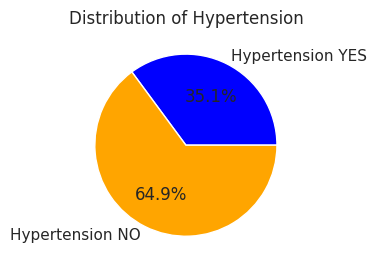

In [182]:
# Splitting the data based on hypertension status
hypertension_yes = heart[heart['high_blood_pressure'] == 1]
hypertension_no = heart[heart['high_blood_pressure'] == 0]

# Counting values for each category
hypertension_counts = [len(hypertension_yes), len(hypertension_no)]

# Plotting the pie chart for hypertension distribution
plt.subplot(1, 2, 2)
plt.pie(hypertension_counts, labels=['Hypertension YES', 'Hypertension NO'], autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Distribution of Hypertension')

plt.tight_layout()
plt.savefig('hypertension_analysis.png')
plt.show()


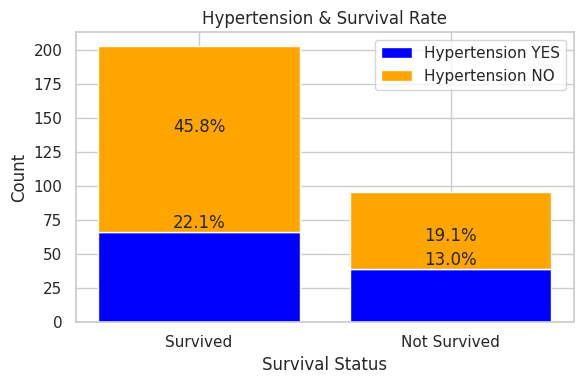

In [183]:
# Extract data for hypertension and survival status
hypertension_yes_survived = hypertension_yes[hypertension_yes["DEATH_EVENT"] == 0]
hypertension_yes_not_survived = hypertension_yes[hypertension_yes["DEATH_EVENT"] == 1]
hypertension_no_survived = hypertension_no[hypertension_no["DEATH_EVENT"] == 0]
hypertension_no_not_survived = hypertension_no[hypertension_no["DEATH_EVENT"] == 1]

# Define labels and values for the bar chart
labels = ['Survived', 'Not Survived']
values_hypertension_yes = [len(hypertension_yes_survived), len(hypertension_yes_not_survived)]
values_hypertension_no = [len(hypertension_no_survived), len(hypertension_no_not_survived)]

# Plot the bar chart
plt.figure(figsize=(6, 4))
bars1 = plt.bar(labels, values_hypertension_yes, label='Hypertension YES', color='blue')
bars2 = plt.bar(labels, values_hypertension_no, bottom=values_hypertension_yes, label='Hypertension NO', color='orange')
plt.title('Hypertension & Survival Rate')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.legend()

# Add text annotations with percentages
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{height / sum(values_hypertension_yes + values_hypertension_no) * 100:.1f}%',
                 ha='center', va='bottom')

plt.tight_layout()
plt.savefig('hypertension_survival_rate.png')
plt.show()


### 1. Of the total population, nearly 35% suffer from high blood pressure or hypertension.

### 2. Of the 35% population who suffered from the condition, 22% survived the event of heart failure while 13% succumbed to it.

### 3. Of the 65% population who do not suffer from hypertension, 45.8% survived the event of heart failure while 19% succumbed to the condition.

### 4. This suggests a potential correlation between hypertension and mortality, indicating that patients without hypertension may have a higher likelihood of survival compared to those with hypertension. However, further statistical testing is necessary to confirm this relationship.

## 9. Effect of Anaemia on Survival Rate

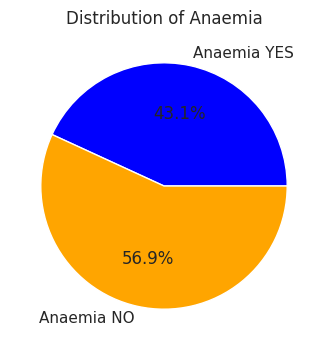

In [184]:
# Splitting the data based on anaemia status
anaemia_yes = heart[heart['anaemia'] == 1]
anaemia_no = heart[heart['anaemia'] == 0]

# Counting values for each category
anaemia_counts = [len(anaemia_yes), len(anaemia_no)]

# Plot the pie chart for the distribution of anaemia
plt.figure(figsize=(6, 4))
plt.pie(anaemia_counts, labels=['Anaemia YES', 'Anaemia NO'], autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Distribution of Anaemia')

plt.savefig('anaemia_distribution_pie_chart.png')
plt.show()


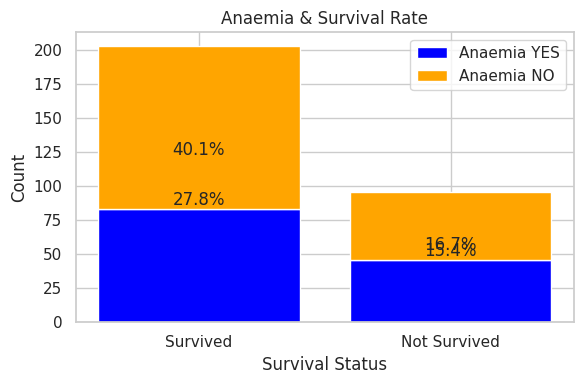

In [185]:
# Extract data for anaemia and survival status
anaemia_yes_survived = anaemia_yes[anaemia_yes["DEATH_EVENT"] == 0]
anaemia_yes_not_survived = anaemia_yes[anaemia_yes["DEATH_EVENT"] == 1]
anaemia_no_survived = anaemia_no[anaemia_no["DEATH_EVENT"] == 0]
anaemia_no_not_survived = anaemia_no[anaemia_no["DEATH_EVENT"] == 1]

# Define labels and values for the bar chart
labels = ['Survived', 'Not Survived']
values_anaemia_yes = [len(anaemia_yes_survived), len(anaemia_yes_not_survived)]
values_anaemia_no = [len(anaemia_no_survived), len(anaemia_no_not_survived)]

# Plot the bar chart
plt.figure(figsize=(6, 4))
bars1 = plt.bar(labels, values_anaemia_yes, label='Anaemia YES', color='blue')
bars2 = plt.bar(labels, values_anaemia_no, bottom=values_anaemia_yes, label='Anaemia NO', color='orange')
plt.title('Anaemia & Survival Rate')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.legend()

# Add text annotations with percentages
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{height / sum(values_anaemia_yes + values_anaemia_no) * 100:.1f}%',
                 ha='center', va='bottom')

plt.tight_layout()
plt.savefig('anaemia_survival_rate.png')
plt.show()


### Analysis of Anaemia and Heart Failure

1. **Anaemia Observation**:
   - Approximately 43.1% of the total population exhibit symptoms of Anaemia, while approximately 56.9% do not show any signs of Anaemia.

2. **Anaemia and Heart Failure**:
   - Among individuals with Anaemia:
     - 27.8% of the population survived the event of a heart failure.
     - 13.4% of the population succumbed to the condition.

3. **No Anaemia and Heart Failure**:
   - Among individuals without Anaemia:
     - 40.1% of the population survived the event of a heart failure.
     - 19.7% of the population succumbed to the condition.

4. **Correlation Analysis**:
   - These findings suggest a potential correlation between Anaemia and mortality.
   - Patients without Anaemia may have a higher likelihood of survival compared to those with Anaemia.
   - However, further statistical testing is necessary to confirm this relationship.


## Effect of Diabetes on Survival Rate

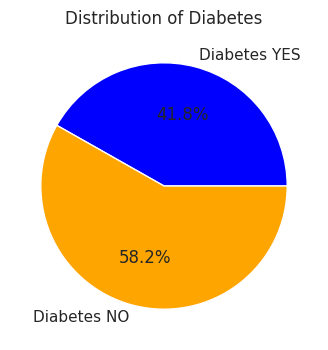

In [186]:
#Splitting the data based on diabetes status
diabetes_yes = heart[heart['diabetes'] == 1]
diabetes_no = heart[heart['diabetes'] == 0]

# Counting values for each category
diabetes_counts = [len(diabetes_yes), len(diabetes_no)]

# Plotting the pie chart for the distribution of diabetes
plt.figure(figsize=(6, 4))
plt.pie(diabetes_counts, labels=['Diabetes YES', 'Diabetes NO'], autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Distribution of Diabetes')

plt.savefig('diabetes_distribution.png')
plt.show()


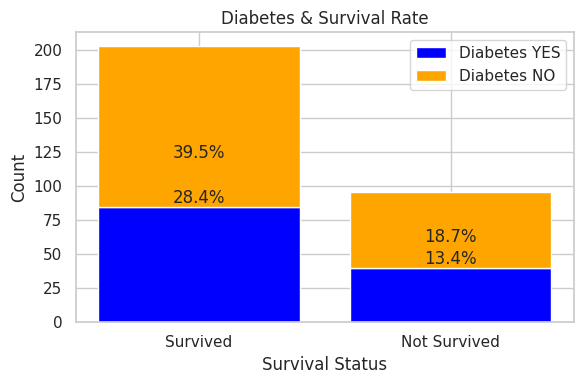

In [187]:
# Extract data for diabetes and survival status
diabetes_yes_survived = diabetes_yes[diabetes_yes["DEATH_EVENT"] == 0]
diabetes_yes_not_survived = diabetes_yes[diabetes_yes["DEATH_EVENT"] == 1]
diabetes_no_survived = diabetes_no[diabetes_no["DEATH_EVENT"] == 0]
diabetes_no_not_survived = diabetes_no[diabetes_no["DEATH_EVENT"] == 1]

# Define labels and values for the bar chart
labels = ['Survived', 'Not Survived']
values_diabetes_yes = [len(diabetes_yes_survived), len(diabetes_yes_not_survived)]
values_diabetes_no = [len(diabetes_no_survived), len(diabetes_no_not_survived)]

# Plot the bar chart
plt.figure(figsize=(6, 4))
bars1 = plt.bar(labels, values_diabetes_yes, label='Diabetes YES', color='blue')
bars2 = plt.bar(labels, values_diabetes_no, bottom=values_diabetes_yes, label='Diabetes NO', color='orange')
plt.title('Diabetes & Survival Rate')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.legend()

# Add text annotations with percentages
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{height / sum(values_diabetes_yes + values_diabetes_no) * 100:.1f}%',
                 ha='center', va='bottom')

plt.tight_layout()
plt.savefig('diabetes_survival_rate.png')
plt.show()


### Analysis of Diabetes and Heart Failure

1. **Diabetes Observation**:
   - Out of the total population, approximately 42% of the people have diabetes, while approximately 58% do not have diabetes.

2. **Diabetes and Heart Failure**:
   - Among individuals with diabetes:
     - 28.4% of the population survived the event of a heart failure.
     - 13.4% of the population succumbed to the condition.

3. **No Diabetes and Heart Failure**:
   - Among individuals without diabetes:
     - 39.5% of the population survived the event of a heart failure.
     - 18.7% of the population succumbed to the condition.


## Effect of Smoking on Survival Rate

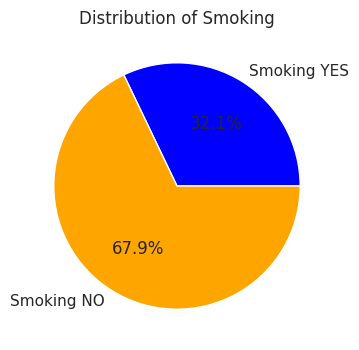

In [188]:
# Splitting the data based on smoking status
smoking_yes = heart[heart['smoking'] == 1]
smoking_no = heart[heart['smoking'] == 0]

# Counting values for each category
smoking_counts = [len(smoking_yes), len(smoking_no)]

# Plotting the pie chart for the distribution of smoking
plt.figure(figsize=(6, 4))
plt.pie(smoking_counts, labels=['Smoking YES', 'Smoking NO'], autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Distribution of Smoking')

plt.savefig('smoking_distribution.png')
plt.show()


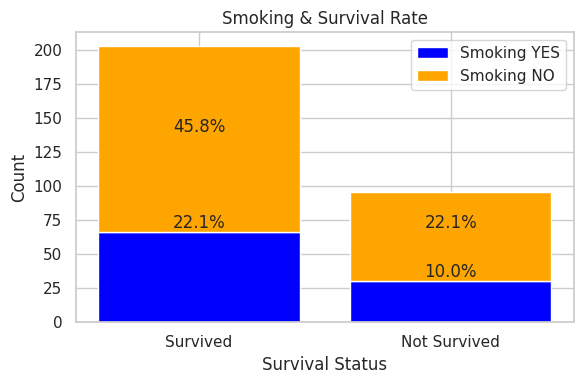

In [189]:
# Extract data for smoking and survival status
smoking_yes_survived = smoking_yes[smoking_yes["DEATH_EVENT"] == 0]
smoking_yes_not_survived = smoking_yes[smoking_yes["DEATH_EVENT"] == 1]
smoking_no_survived = smoking_no[smoking_no["DEATH_EVENT"] == 0]
smoking_no_not_survived = smoking_no[smoking_no["DEATH_EVENT"] == 1]

# Define labels and values for the bar chart
labels = ['Survived', 'Not Survived']
values_smoking_yes = [len(smoking_yes_survived), len(smoking_yes_not_survived)]
values_smoking_no = [len(smoking_no_survived), len(smoking_no_not_survived)]

# Plot the bar chart
plt.figure(figsize=(6, 4))
bars1 = plt.bar(labels, values_smoking_yes, label='Smoking YES', color='blue')
bars2 = plt.bar(labels, values_smoking_no, bottom=values_smoking_yes, label='Smoking NO', color='orange')
plt.title('Smoking & Survival Rate')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.legend()

# Add text annotations with percentages
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{height / sum(values_smoking_yes + values_smoking_no) * 100:.1f}%',
                 ha='center', va='bottom')

plt.tight_layout()
plt.savefig('smoking_survival_rate.png')
plt.show()


### Understanding Smoking Habits and Heart Failure

1. **Smoking Habits**:
   - Among everyone surveyed, about 32% are smokers, while around 68% do not smoke.

2. **Impact of Smoking on Heart Failure**:
   - For those who smoke:
     - About 22.1% survived a heart failure event.
     - Approximately 10% did not survive.

3. **Heart Failure Among Non-Smokers**:
   - Among non-smokers:
     - Approximately 45.8% survived a heart failure event.
     - About 22.1% did not survive.

This suggests that smoking may have a significant impact on the likelihood of surviving a heart failure event. Non-smokers seem to have a higher chance of survival compared to smokers.


## Correlation Matrix

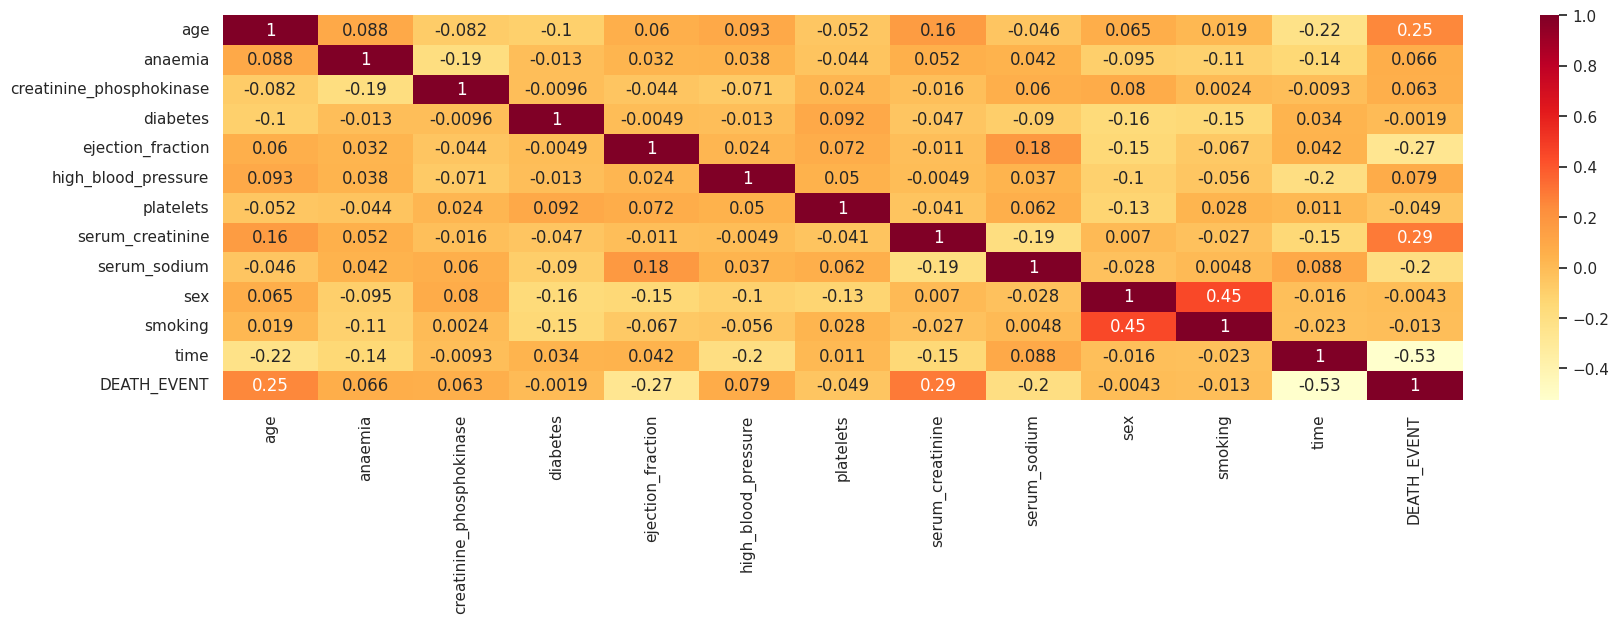

In [190]:
# Define the colormap
colors = sns.color_palette("coolwarm", as_cmap=True)

# Plot the heatmap with annotations
plt.figure(figsize=(20, 5))
sns.heatmap(heart.corr(), cmap="YlOrRd", annot=True)
plt.show()


## Numerical Features
### creatinine_phosphokinase

### ejection_fraction

### platelets

### serum_creatinine

### serum_sodium



## Numerical Features vs Target Variable (DEATH_EVENT) :

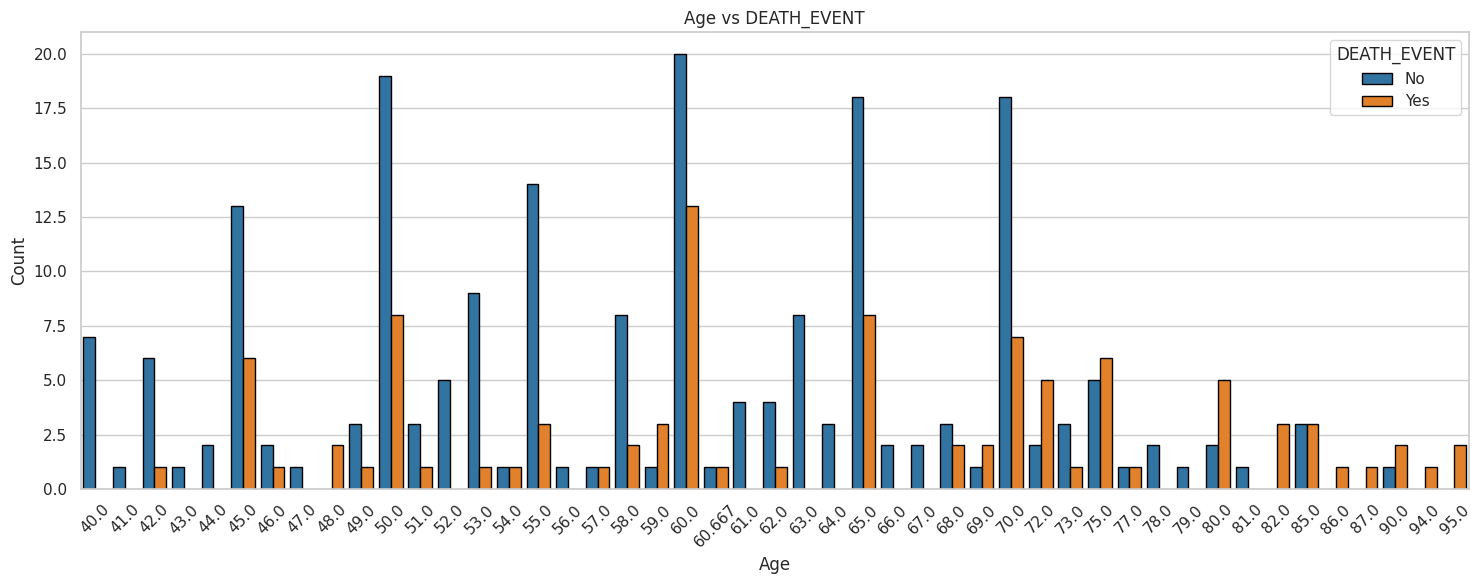

In [191]:
colors = ["#1f77b4", "#ff7f0e"]
plt.figure(figsize=(15, 6))
sns.countplot(x='age', data=heart, hue='DEATH_EVENT', palette=colors, edgecolor='black')
plt.title('Age vs DEATH_EVENT')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.legend(title='DEATH_EVENT', labels=['No', 'Yes'])
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

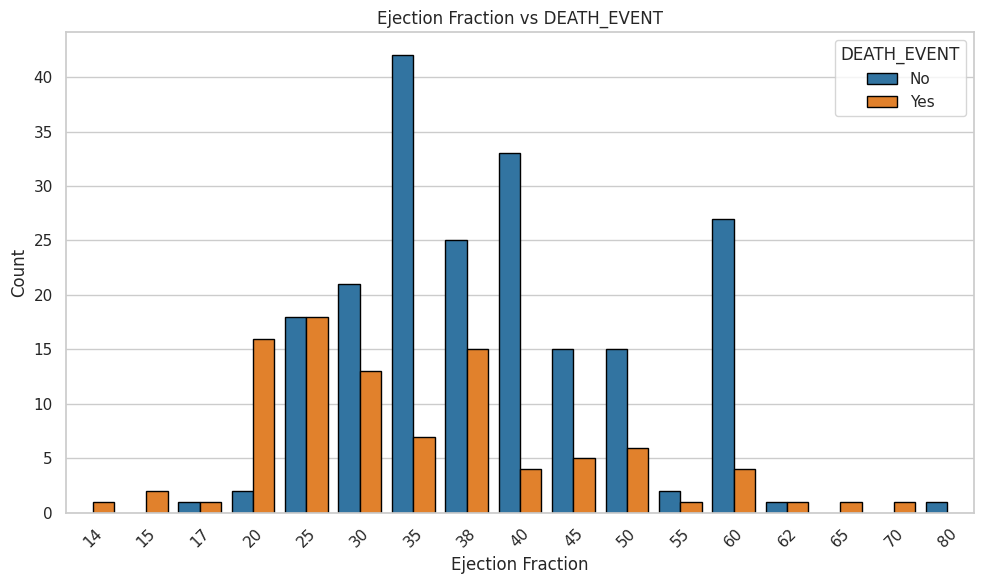

In [192]:
colors = ["#1f77b4", "#ff7f0e"]
plt.figure(figsize=(10, 6))
sns.countplot(x='ejection_fraction', data=heart, hue='DEATH_EVENT', palette=colors, edgecolor='black')
plt.title('Ejection Fraction vs DEATH_EVENT')
plt.xlabel('Ejection Fraction')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.legend(title='DEATH_EVENT', labels=['No', 'Yes'])
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

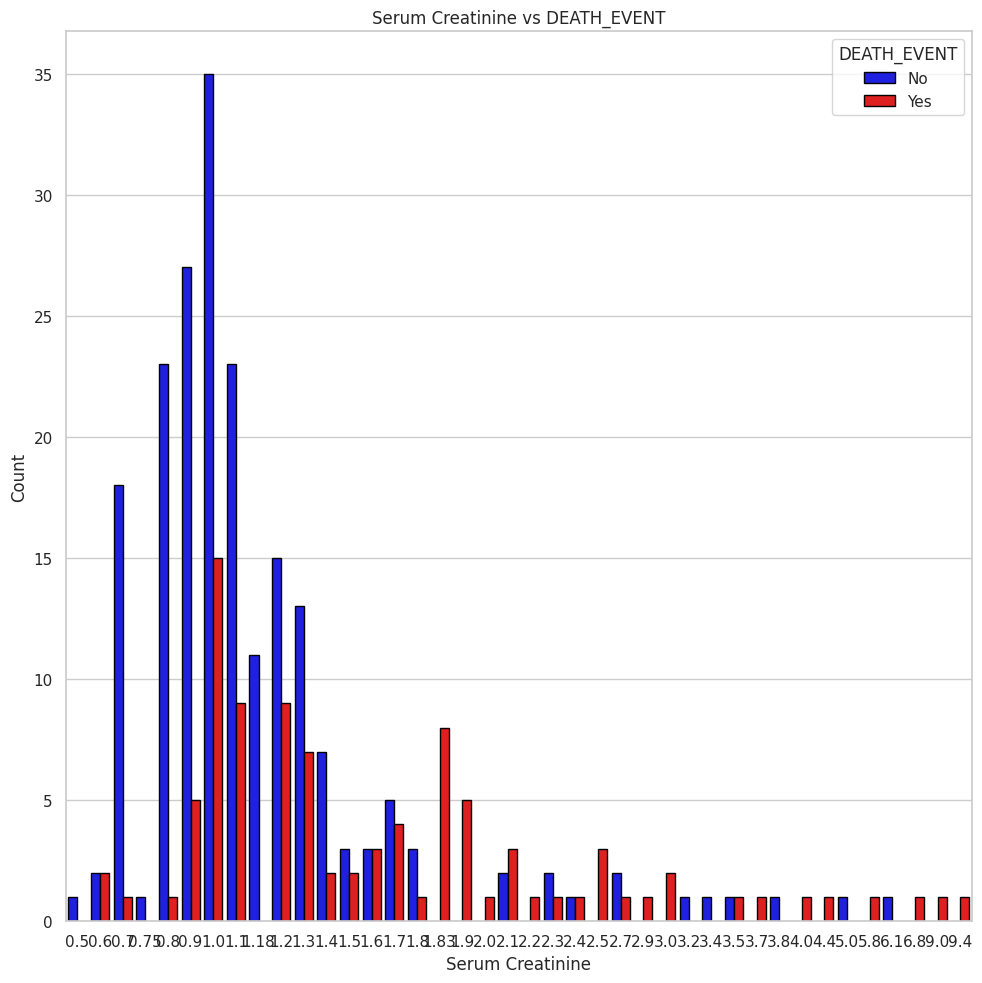

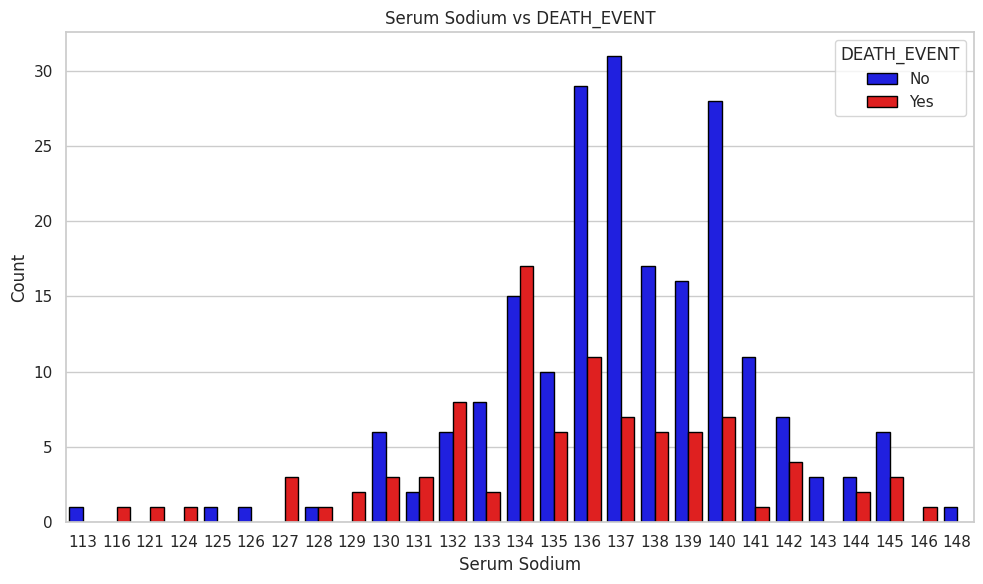

In [193]:
# Convert the 'DEATH_EVENT' column to string
heart['DEATH_EVENT'] = heart['DEATH_EVENT'].astype(str)

# Set your desired color palette
colors = ['blue', 'red']

# Create the count plot for serum_creatinine vs DEATH_EVENT
plt.figure(figsize=(10, 10))
sns.countplot(x='serum_creatinine', data=heart, hue='DEATH_EVENT', palette=colors, edgecolor='black')
plt.title('Serum Creatinine vs DEATH_EVENT')
plt.xlabel('Serum Creatinine')
plt.ylabel('Count')
plt.legend(title='DEATH_EVENT', labels=['No', 'Yes'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=55, ha='right')
ax.tick_params(axis='x', pad=10)
plt.tight_layout()
plt.show()

# Create the count plot for serum_sodium vs DEATH_EVENT
plt.figure(figsize=(10, 6))
sns.countplot(x='serum_sodium', data=heart, hue='DEATH_EVENT', palette=colors, edgecolor='black')
plt.title('Serum Sodium vs DEATH_EVENT')
plt.xlabel('Serum Sodium')
plt.ylabel('Count')
plt.legend(title='DEATH_EVENT', labels=['No', 'Yes'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=55, ha='right')
ax.tick_params(axis='x', pad=10)
plt.tight_layout()
plt.show()

### Insights on DEATH_EVENT
- DEATH_EVENT becomes more common at age 45 and continues to rise at certain ages: 50, 60, 65, 70, 75, and 80. This suggests that individuals are more likely to experience a DEATH_EVENT, often due to heart failure, starting from these ages.

### Ejection Fraction and DEATH_EVENT
- There's a higher incidence of DEATH_EVENT cases when the ejection fraction falls between 20 and 60. Ejection fraction measures how effectively the heart pumps out blood with each beat. Falling within this range indicates a heightened risk of experiencing a DEATH_EVENT.

### Serum Creatinine Levels and DEATH_EVENT
- Serum creatinine levels ranging from 0.6 to 3.0 are associated with an increased likelihood of experiencing a DEATH_EVENT. Serum creatinine reflects kidney function, and levels within this range may indicate suboptimal kidney function, contributing to the risk of a DEATH_EVENT.

### Serum Sodium Levels and DEATH_EVENT
- Higher serum sodium levels, specifically between 127 and 145, suggest a greater probability of experiencing a DEATH_EVENT due to heart failure. Serum sodium, an electrolyte crucial for fluid balance in the body, often falls within this range in individuals with heart-related issues leading to DEATH_EVENT.


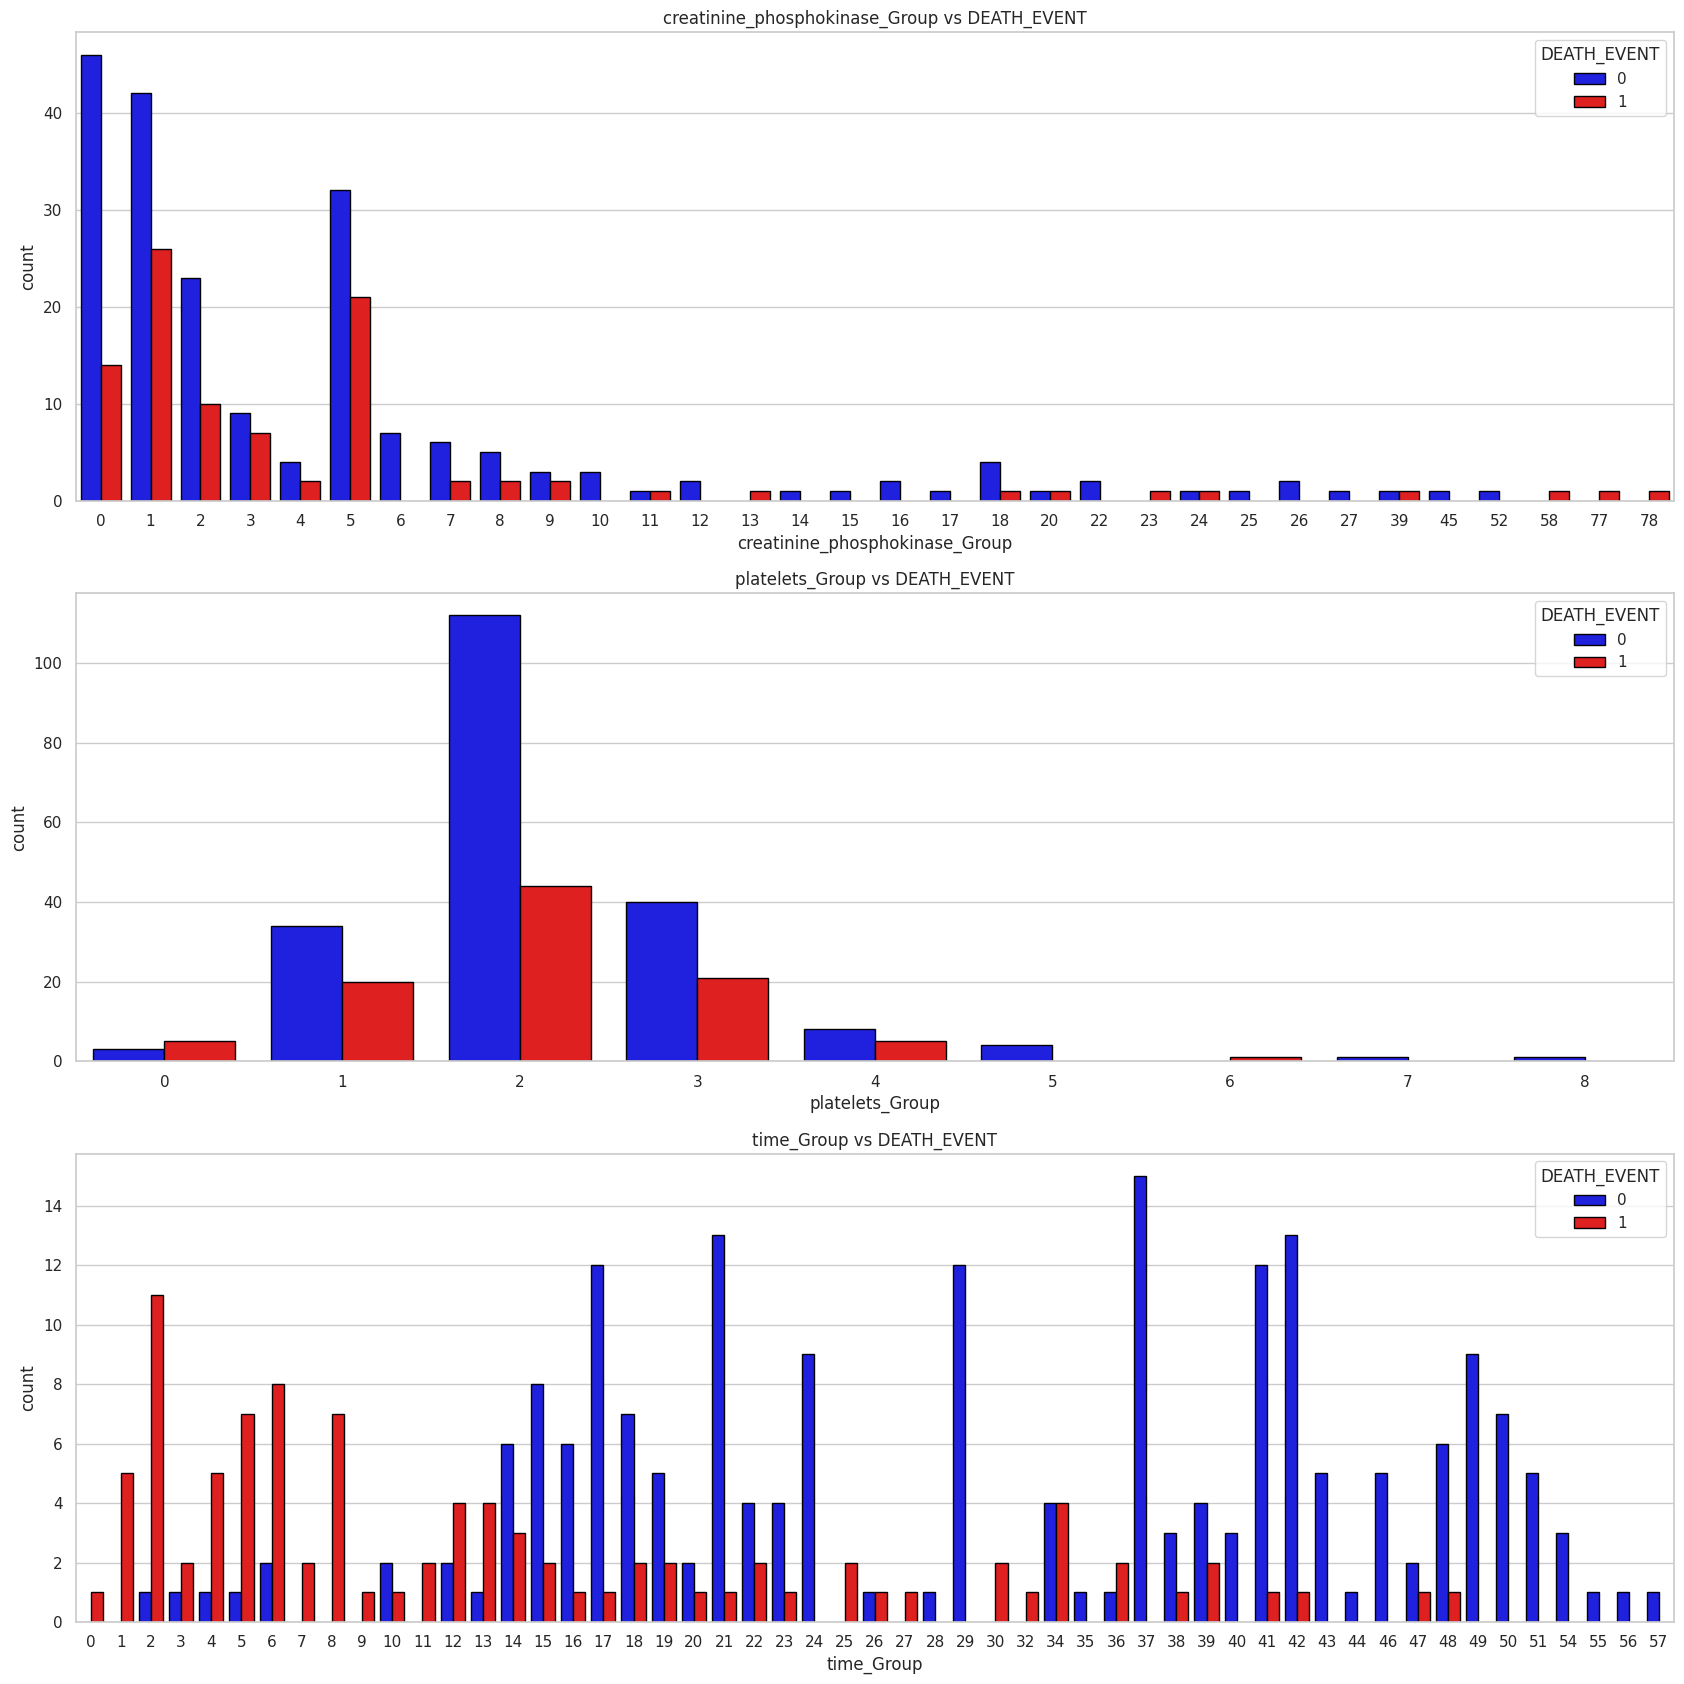

In [194]:
heart = pd.read_csv(r"heart_failure_clinical_records_dataset.csv")
heart['creatinine_phosphokinase_Group'] = [int(i / 100) for i in heart['creatinine_phosphokinase']]
heart['platelets_Group'] = [int(i / 10**5) for i in heart['platelets']]
heart['time_Group'] = [int(i / 5) for i in heart['time']]

# Set your desired color palette
colors = ['blue', 'red']

# Plotting the count plots
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(17, 17))
group_numerical_features = [i + '_Group' for i in ['creatinine_phosphokinase', 'platelets', 'time']]

for i, feature in enumerate(group_numerical_features):
    # Check if there are non-empty categories in the current feature
    if heart[feature].nunique() > 0:
        sns.countplot(x=feature, data=heart, hue="DEATH_EVENT", palette=colors, edgecolor='black', ax=ax[i])
        title = feature + ' vs DEATH_EVENT'
        ax[i].set_title(title)

plt.tight_layout()
plt.show()

**2) Apply Machine Learning Modeling on the dataset using all the above 4 algorithms.
Tune (hyper-parameter tuning) each model by calling the GridSearchCV method.
Indicate which combination of Hyperparameters produces the best result. Note: Use
accuracy and AUC-ROC metrics when evaluating your models.**

### Data Preparation


In [195]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.80, test_size=0.20, random_state=2)

# LOGISTIC REGRESSION

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

In [197]:
# Define logistic regression model
lr_model = LogisticRegression(max_iter=5000, random_state=0, solver='saga')

In [198]:
# Define hyperparameter grid for tuning
parameter_lr = {
    'C': [0.001, 0.01, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [199]:
# Perform hyperparameter tuning using GridSearchCV
grid_lr = GridSearchCV(lr_model, parameter_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=5000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [200]:
# Get the best hyperparameters
hyper_parameters = grid_lr.best_params_
print("Best hyperparameters for Logistic Regression:", hyper_parameters)

Best hyperparameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [201]:
# Train the logistic regression model with the best hyperparameters
classifier = LogisticRegression(random_state=0, **hyper_parameters)
classifier.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [202]:
# Make predictions
assume_lr = classifier.predict(X_test)

In [203]:
# Evaluate the model
accuracy_lr = accuracy_score(y_test, assume_lr)
auc_roc_lr = roc_auc_score(y_test, assume_lr)
print("Logistic Regression - Accuracy:", accuracy_lr)
print("Logistic Regression - AUC-ROC:", auc_roc_lr)

Logistic Regression - Accuracy: 0.8666666666666667
Logistic Regression - AUC-ROC: 0.8180574555403557


# Decision Tree (DT)

In [207]:
dt = DecisionTreeClassifier(random_state=0)

In [208]:
# Define hyperparameter grid for tuning
parameters_dt = {
    'max_depth': [3, 7, 9]  # Maximum depth of the tree
}

In [209]:
# Perform hyperparameter tuning using GridSearchCV
grid_for_dt = GridSearchCV(dt, parameters_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_for_dt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              random_state=0, splitter='best'),
             n_jobs=-1, param_grid={'max_depth': [3, 7, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [210]:
# Get the best hyperparameters
best_parameters = grid_for_dt.best_params_
print("Best hyperparameters for Decision Tree:", best_parameters)

Best hyperparameters for Decision Tree: {'max_depth': 3}


In [211]:
# Train the Decision Tree model with the best hyperparameters
classifier_for_dt = DecisionTreeClassifier(random_state=0, **best_parameters)
classifier_for_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=0, splitter='best')

In [212]:
# Make predictions
predict_for_dt = classifier_for_dt.predict(X_test)

In [213]:
# Evaluate the model
accuracy_dt = accuracy_score(y_test, predict_for_dt)
auc_roc_dt = roc_auc_score(y_test, predict_for_dt)
print("Decision Tree - Accuracy:", accuracy_dt)
print("Decision Tree - AUC-ROC:", auc_roc_dt)

Decision Tree - Accuracy: 0.8833333333333333
Decision Tree - AUC-ROC: 0.8296853625170999


# Random Forest (RF)

In [214]:
# Define Random Forest model
rf = RandomForestClassifier(random_state=0)

In [215]:
# Define hyperparameter grid for tuning
param_and_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50]  # Maximum depth of the trees
}

In [216]:
# Perform hyperparameter tuning using GridSearchCV
tuning = GridSearchCV(rf, param_and_grid, cv=5, scoring='accuracy', n_jobs=-1)
tuning.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'n_estimators': [50, 100, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [217]:
# Get the best hyperparameters
best_parameters_rf = tuning.best_params_
print("Best hyperparameters for Random Forest:", best_parameters_rf)

Best hyperparameters for Random Forest: {'max_depth': 10, 'n_estimators': 200}


In [218]:
# Train the Random Forest model with the best hyperparameters
best_hyperparam = RandomForestClassifier(random_state=0, **best_parameters_rf)
best_hyperparam.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)

In [219]:
# Make predictions
predict_rf = tuning.predict(X_test)

In [220]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, predict_rf)
auc_roc_rf = roc_auc_score(y_test, predict_rf)
print("Random Forest - Accuracy:", accuracy_rf)
print("Random Forest - AUC-ROC:", auc_roc_rf)

Random Forest - Accuracy: 0.9333333333333333
Random Forest - AUC-ROC: 0.9001367989056086


# XGBoost (XGB)

In [221]:
from xgboost import XGBClassifier

In [222]:
# Define XGBoost model
xgb = XGBClassifier(random_state=0)

In [223]:
# Define hyperparameter grid for tuning
hyper_param_xgb = {
    'learning_rate': [0.01, 0.2, 0.5],  # Learning rate
    'max_depth': [3, 7, 9],  # Maximum depth of trees
    'n_estimators': [100, 150, 200]
}

In [224]:
# Perform hyperparameter tuning using GridSearchCV
search_xgb = GridSearchCV(xgb, hyper_param_xgb, cv=5, scoring='accuracy', n_jobs=-1)
search_xgb.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     lea...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='binary:logistic', ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.2, 0.5],
                         'max_depth': [3, 7, 9],
                         'n_estimators': [100, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [225]:
# Get the best hyperparameters
best_for_xgb = search_xgb.best_params_
print("Best hyperparameters for XGBoost:", best_for_xgb)

Best hyperparameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}


In [226]:
# Train the XGBoost model with the best hyperparameters
best_parameters = XGBClassifier(random_state=0, **best_for_xgb)
best_parameters.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, objective='binary:logistic', ...)

In [227]:
# Make predictions
predict_xgb =best_parameters.predict(X_test)

In [228]:
# Evaluate the model
accuracy_xgb = accuracy_score(y_test, predict_xgb)
auc_roc_xgb = roc_auc_score(y_test, predict_xgb)
print("XGBoost - Accuracy:", accuracy_xgb)
print("XGBoost - AUC-ROC:", auc_roc_xgb)

XGBoost - Accuracy: 0.9333333333333333
XGBoost - AUC-ROC: 0.8823529411764706


In [229]:
from tabulate import tabulate

# Define classifier names and their corresponding scores
classifiers = ['XGBoost', 'Decision Tree', 'Logistic Regression', 'Random Forest']
scores = [accuracy_xgb, accuracy_dt, accuracy_lr, accuracy_rf]
auc_rocs = [auc_roc_xgb, auc_roc_dt, auc_roc_lr, auc_roc_rf]

# Create a DataFrame
results_df = pd.DataFrame({
    'Classifier': classifiers,
    'Accuracy': scores,
    'AUC-ROC': auc_rocs
})

table = tabulate(results_df, headers='keys', tablefmt='fancy_grid')

# Print the DataFrame
print("Classifier Performance:")
print(table)

Classifier Performance:
╒════╤═════════════════════╤════════════╤═══════════╕
│    │ Classifier          │   Accuracy │   AUC-ROC │
╞════╪═════════════════════╪════════════╪═══════════╡
│  0 │ XGBoost             │   0.933333 │  0.882353 │
├────┼─────────────────────┼────────────┼───────────┤
│  1 │ Decision Tree       │   0.883333 │  0.829685 │
├────┼─────────────────────┼────────────┼───────────┤
│  2 │ Logistic Regression │   0.866667 │  0.818057 │
├────┼─────────────────────┼────────────┼───────────┤
│  3 │ Random Forest       │   0.933333 │  0.900137 │
╘════╧═════════════════════╧════════════╧═══════════╛


### 3.Perform Machine Learning Interpretability / Explanability tasks as follows:


### a. Use the 'eli5' library to interpret the "white box" model of Logistic Regression. Apply 'eli5' to visualize the weights associated to each feature. Use 'eli5' to explain specific predictions, pick a row in the test data with negative label and one with positive

In [230]:
import eli5
from tabulate import tabulate

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

# Show feature weights for logistic regression
lr_weights = eli5.explain_weights_df(lr_model, feature_names=X.columns.tolist())

# Define negative and positive instances
y_test_df = pd.DataFrame(y_test, columns=['DEATH_EVENT'])
negative_instance = X_test_scaled[y_test_df['DEATH_EVENT'] == 0][0]
positive_instance = X_test_scaled[y_test_df['DEATH_EVENT'] == 1][0]

# Explain predictions for logistic regression
lr_neg_explanation = eli5.explain_prediction_df(lr_model, negative_instance, feature_names=X.columns.tolist())
lr_pos_explanation = eli5.explain_prediction_df(lr_model, positive_instance, feature_names=X.columns.tolist())

# Prepare results for tabular display
results_lr = {
    "Logistic Regression Weights": lr_weights,
    "Logistic Regression Negative Prediction Explanation": lr_neg_explanation,
    "Logistic Regression Positive Prediction Explanation": lr_pos_explanation,
}

# Display results in tabular format
for key, value in results_lr.items():
    print(f"\n{key}:")
    print(tabulate(value, headers='keys', tablefmt='fancy_grid'))


Logistic Regression Weights:
╒════╤══════════╤══════════════════════════╤═════════════╕
│    │   target │ feature                  │      weight │
╞════╪══════════╪══════════════════════════╪═════════════╡
│  0 │        1 │ serum_creatinine         │  0.738333   │
├────┼──────────┼──────────────────────────┼─────────────┤
│  1 │        1 │ age                      │  0.526303   │
├────┼──────────┼──────────────────────────┼─────────────┤
│  2 │        1 │ creatinine_phosphokinase │  0.374565   │
├────┼──────────┼──────────────────────────┼─────────────┤
│  3 │        1 │ anaemia                  │  0.0202365  │
├────┼──────────┼──────────────────────────┼─────────────┤
│  4 │        1 │ diabetes                 │  0.0139121  │
├────┼──────────┼──────────────────────────┼─────────────┤
│  5 │        1 │ smoking                  │ -0.00764726 │
├────┼──────────┼──────────────────────────┼─────────────┤
│  6 │        1 │ high_blood_pressure      │ -0.0988086  │
├────┼──────────┼─────────

**b. Use the 'eli5' library to interpret the "white box" model of Decision Tree. Apply 'eli5' to list the feature importance ordered by the highest value.**

In [231]:
# Train decision tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

# Show feature importances for decision tree
dt_weights = eli5.explain_weights_df(dt_model, feature_names=X.columns.tolist(), top=10)

# Explain predictions for decision tree
dt_neg_explanation = eli5.explain_prediction_df(dt_model, negative_instance, feature_names=X.columns.tolist())
dt_pos_explanation = eli5.explain_prediction_df(dt_model, positive_instance, feature_names=X.columns.tolist())

# Prepare results for tabular display
results_dt = {
    "Decision Tree Feature Importances": dt_weights,
    "Decision Tree Negative Prediction Explanation": dt_neg_explanation,
    "Decision Tree Positive Prediction Explanation": dt_pos_explanation,
}

# Display results in tabular format
for key, value in results_dt.items():
    print(f"\n{key}:")
    print(tabulate(value, headers='keys', tablefmt='fancy_grid'))



Decision Tree Feature Importances:
╒════╤══════════════════════════╤═══════════╕
│    │ feature                  │    weight │
╞════╪══════════════════════════╪═══════════╡
│  0 │ time                     │ 0.395471  │
├────┼──────────────────────────┼───────────┤
│  1 │ serum_creatinine         │ 0.161323  │
├────┼──────────────────────────┼───────────┤
│  2 │ ejection_fraction        │ 0.147373  │
├────┼──────────────────────────┼───────────┤
│  3 │ creatinine_phosphokinase │ 0.061994  │
├────┼──────────────────────────┼───────────┤
│  4 │ age                      │ 0.0580719 │
├────┼──────────────────────────┼───────────┤
│  5 │ serum_sodium             │ 0.0508271 │
├────┼──────────────────────────┼───────────┤
│  6 │ anaemia                  │ 0.0371862 │
├────┼──────────────────────────┼───────────┤
│  7 │ smoking                  │ 0.0294128 │
├────┼──────────────────────────┼───────────┤
│  8 │ platelets                │ 0.02067   │
├────┼──────────────────────────┼───────────

**c. Use LIME to explain both the Random Forest and the XGBoost models.
Create a LIME explainer by using the LimeTabularExplainer method, the main
explainer to use for tabular data.
LIME fits a linear model on a local shuffled dataset. Access the coefficients, the
intercept and the R2 of the linear model, for both model interpretability**

In [243]:
from lime.lime_tabular import LimeTabularExplainer

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=2)

# Train Random Forest model with best parameters
rf_best_model = RandomForestClassifier(**best_parameters_rf)
rf_best_model.fit(X_train, y_train)

# Train XGBoost model with best parameters
xgb_best_model = XGBClassifier(**best_for_xgb)
xgb_best_model.fit(X_train, y_train)

# Define LimeTabularExplainer for both models
rf_explainer = LimeTabularExplainer(X_train_scaled, mode='regression', feature_names=X.columns.tolist(),
                                     class_names=['0', '1'], discretize_continuous=True)
xgb_explainer = LimeTabularExplainer(X_train_scaled, mode='regression', feature_names=X.columns.tolist(),
                                      class_names=['0', '1'], discretize_continuous=True)

# Explain predictions for Random Forest
negative_instance_rf = X_test_scaled[y_test_df['DEATH_EVENT'] == 0][0]
rf_exp_negative = rf_explainer.explain_instance(negative_instance_rf, rf_best_model.predict_proba,
                                                num_features=len(X.columns.tolist()), top_labels=1)

# Explain predictions for XGBoost
positive_instance_xgb = X_test_scaled[y_test_df['DEATH_EVENT'] == 1][0]
xgb_exp_positive = xgb_explainer.explain_instance(positive_instance_xgb, xgb_best_model.predict_proba,
                                                  num_features=len(X.columns.tolist()), top_labels=1)

# Visualize LIME explanations
print("\nLIME Explanation for Random Forest")
rf_exp_negative.show_in_notebook()

print("\nLIME Explanation for XGBoost")
xgb_exp_positive.show_in_notebook()



LIME Explanation for Random Forest



LIME Explanation for XGBoost


**d. Use SHAP library to interpret the XGBoost model – specifically, TreeExplainer.
This method of SHAP, TreeExplainer, is optimized for tree-based models.
Visualize your explanations, one for positive and one for negative, using the
‘force_plot’ function.
Note; You need to establish a ‘base value’ in order to be used by ‘force_plot’. The
explainer.expected_value is the ‘base value’.
Create the feature importance plot by calling SHAP’s ‘summary_plot’ function,
for each class / label.**

In [150]:
import shap

# Create a SHAP TreeExplainer
xgb_explainer = shap.TreeExplainer(xgb_best_model)

# Get SHAP values for negative label samples
shap_values_negative = shap_values[:len(X_test_scaled[y_test == 0])]

# Initialize SHAP visualization
shap.initjs()

# SHAP Explanation for Negative Label
print("\nSHAP Explanation for Negative Label:")
shap.force_plot(xgb_explainer.expected_value, shap_values_negative, X_test_scaled[y_test == 0], feature_names=X.columns.tolist())


SHAP Explanation for Negative Label:


In [133]:
xgb_explainer = shap.TreeExplainer(xgb_best_model)
shap_values = xgb_explainer.shap_values(X_test_scaled)

positive_idx = np.argmax(xgb_best_model.predict_proba(X_test_scaled[y_test == 1])[:, 1])

shap.initjs()

# SHAP Explanation for Positive Label
print("\nSHAP Explanation for Positive Label:")
shap.force_plot(xgb_explainer.expected_value, shap_values[positive_idx:25], X_test_scaled[y_test == 1], feature_names=X.columns.tolist())


SHAP Explanation for Positive Label:


## 4) Predict observations, one for positive and one for negative label, by using all four (4)
## models and indicate which one gives the better prediction.
#### Provide output for showing the accuracy of each model as follows:
#### False/True label: 0/1 (or 0/1 depending how you define labels)
#### • LR: [prob_T prob_F]
#### • DT: [prob_T prob_F]
#### • RF: [prob_T prob_F]
#### • XGB: [prob_T prob_F]

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=2)

In [235]:
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)

def get_predictions(model, X_test):
    return model.predict_proba(X_test)

def get_accuracy(model, X_test, y_test):
    return model.score(X_test, y_test)

def print_accuracy(model_name, accuracy):
    print(f"{model_name} Accuracy: {accuracy:.2%}")

def print_predictions(model_name, predictions):
    print(f"Prediction for Observation 0 ({model_name}): {[f'{prob * 100:.2f}%' for prob in predictions[0]]}\n")

In [236]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

In [237]:
for model_name, model in models.items():
    train_model(model, X_train, y_train)

In [238]:
for model_name, model in models.items():
    predictions = get_predictions(model, X_test)
    accuracy = get_accuracy(model, X_test, y_test)
    print_accuracy(model_name, accuracy)

    print_predictions(model_name, predictions)

Logistic Regression Accuracy: 86.67%
Prediction for Observation 0 (Logistic Regression): ['85.44%', '14.56%']

Decision Tree Accuracy: 85.00%
Prediction for Observation 0 (Decision Tree): ['100.00%', '0.00%']

Random Forest Accuracy: 93.33%
Prediction for Observation 0 (Random Forest): ['99.00%', '1.00%']

XGBoost Accuracy: 91.67%
Prediction for Observation 0 (XGBoost): ['99.84%', '0.16%']



In [239]:
# Initialize a list to store positive probabilities
positive_probs = []

# Iterate through each model and its name
for model_name, model in models.items():
    # Check if the model supports probability predictions
    if hasattr(model, "predict_proba"):
        # If it does, calculate the probability of the positive class for the first observation in the test data
        positive_prob = model.predict_proba(X_test)[0][1]
    else:
        # If not, assume a default positive probability of 0.5
        positive_prob = 0.5
    # Add the positive probability to the list
    positive_probs.append(positive_prob)

# Find the index of the model with the highest positive probability
better_prediction_index = positive_probs.index(max(positive_probs))

# Get the name of the model with the highest positive probability
better_model_name = list(models.keys())[better_prediction_index]

# Print the name of the model with the highest positive probability
print("\nBetter prediction is from model:", better_model_name)


Better prediction is from model: Logistic Regression
